In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
from sklearn import tree
from matplotlib.colors import LogNorm
import xarray as xr
import time
# my own 'library' below
from tree_regression import cf_tree_regression as cft
from importlib import reload

In [14]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [2]:
# make sure that changes in module are applied in j notebook
reload(cft)

<module 'tree_regression.cf_tree_regression' from '/home/igor/UNI/Master Project/Script/MSC_repo/tree_regression/cf_tree_regression.py'>

In [7]:
 # DEFAULT PARAMETERS - global variables
curdir='/home/igor/UNI/Master Project/Script/Data/'
fname='ncr_pdf_douze_0125deg.nc'
goal_var = 'cl_l'
input_vars = ['qsm', 'qtm', 'qlm', 'skew_l', 'var_l', 'var_t', 'tm', 'pm']
add_vars = ['qvlm','qsm']
eval_fraction=0.6
regtype = 'decision_tree'
max_depth_in=None

In [137]:
missing_value=prepro.ds['skew_l'].missing_value
missing_value

9.96921e+36

In [220]:
skew=prepro.ds['skew_l']
skew_masked=prepro.ds['skew_l'][:]
np.max(skew),np.max(skew_masked)

(9.96921e+36, 496.24576)

In [222]:
skewarr=np.array(skew)

In [224]:
skewarr.max()

9.96921e+36

In [211]:
skew.ravel().max()

496.24576

In [217]:
prepro.X_arr[3]

masked_array(data=[-0.19727905,  0.53289133, -0.56179589, ...,
                   -0.07482954, -0.0489286 , -0.07887524],
             mask=False,
       fill_value=1e+20)

In [139]:
missing_mask=prepro.ds['skew_l']==missing_value

In [194]:
[ prepro.X_arr[i].max() for i in range(len(prepro.X_arr))]

[0.02615196630358696,
 0.01474007498472929,
 0.001534137292765081,
 9.969209968386869e+36,
 4.268100383342244e-06,
 21.25273895263672,
 302.28436279296875,
 102355.6484375,
 0.00153969950042665]

In [184]:
skew=prepro.ds['skew_l'][:]

In [185]:
np.max(skew)

496.24576

In [178]:
# [:] converts netCDF4._netCDF4.Variable to masked array
# negative side-effect is that it does so implicitly, without telling us
masked=prepro.ds['skew_l'][:]==missing_value
np.count_nonzero(masked)

0

In [131]:
prepro.ds['skew_l'].

AttributeError: NetCDF: Attribute not found

In [123]:
np.ma.masked_array?

In [121]:
skew_l_masked=np.ma.masked_array(skew,missing_mask)

In [27]:
'h. level {}'.format(height_level)

'h. level 126'

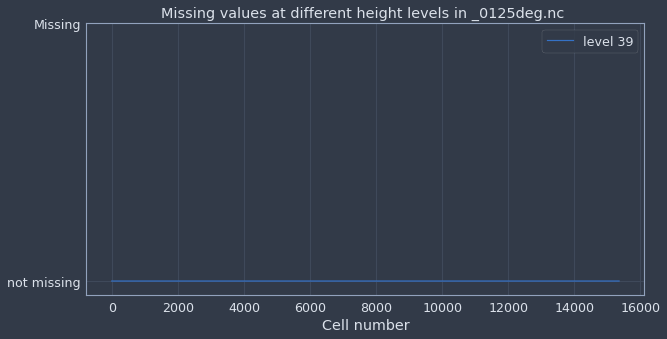

In [48]:
fig,ax=plt.subplots(figsize=(10,5))
for height_level in range(39,40):
    ax.plot(missing_mask[:,0,height_level],label='level {}'.format(height_level))
    
ax.legend()
ax.set_yticks([0,1])
ax.set_yticklabels(['not missing','Missing'])
ax.set_title('Missing values at different height levels in _0125deg.nc ')
ax.set_xlabel('Cell number')
plt.show()

In [ ]:
#  suppress invalid values, using masked array

In [83]:
np.ma?

In [105]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

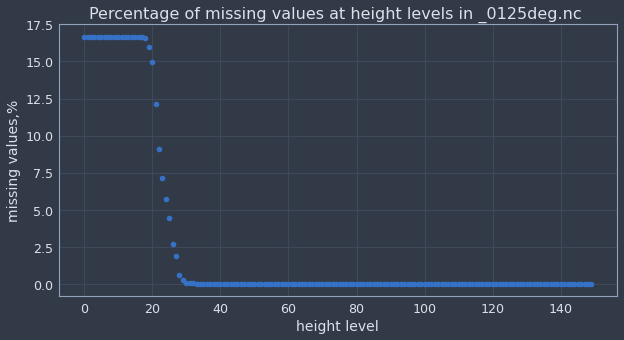

In [49]:
height_levels=missing_mask.shape[2]
total_vals=missing_mask.shape[0]
missing_heights=[]
for i in range(height_levels):
    is_missing=np.count_nonzero(missing_mask[:,0,i])
    percent_missing=is_missing/total_vals
    missing_heights.append(percent_missing*100)

fig=plt.figure(figsize=(10,5))
plt.plot(missing_heights,'o')
plt.ylabel('missing values,%',fontsize=14)
plt.xlabel('height level',fontsize=14)
plt.title('Percentage of missing values at height levels in _0125deg.nc ',fontsize=16)
plt.show()

- mask the first 40 levels of skew_l variable. Its the top-most part of the atmosphere, so can be disregarded. 

In [46]:
prepro.proc_goalvar4??

In [41]:
prepro.read_netcdf4??

In [48]:
prepro.proc_inputvars4??

In [44]:
filepath=curdir+fname
ds=prepro.ds
ds['cl_l'][:]

(15360, 1, 150)

In [6]:
prepro.X_arr.shape

(9, 2304000)

In [136]:
# DATA PREPROCESSING
prepro=cft.DataPrepro(curdir,fname,goal_var,input_vars,add_vars,eval_fraction)
# methods should be in this particular order!!
# prepro.read_netcdf()
prepro.read_netcdf4()
# prepro.proc_goalvar()
prepro.proc_goalvar4()
# prepro.proc_inputvars()
prepro.proc_inputvars4()
# prepro.proc_addvars()
prepro.proc_addvars4()
prepro.split_data()
processed_data = prepro.get_processed_data()

In [23]:
# REGRESSION
goal_var_pred, goalvar_eval = cft.regression(regtype,processed_data,max_depth_in)

In [24]:
prepro.ds.keys()

dict_keys(['time', 'zm', 'qcm', 'qim', 'qvm', 'qtm', 'qlm', 'qvlm', 'qsm', 'qsi', 'tm', 'pm', 'cl', 'cl_l', 'qvu', 'tu', 'qt_min', 'qt_max', 't_min', 't_max', 'skew', 'var_l', 'skew_l', 'var', 'var_t', 'betaq_msl', 'betap_msl', 'betaa_msl', 'betab_msl', 'betaq_p00', 'betap_p00', 'betaa_p00', 'betab_p00', 'betaq_p06', 'betap_p06', 'betaa_p06', 'betab_p06', 'betaa_zsl', 'betab_zsl', 'betap_zsl', 'betaq_zsl', 'betaa_1sl', 'betab_1sl', 'betap_1sl', 'betaq_1sl', 'sat_zm', 'sat_z1', 'cl_msl', 'cl_p00', 'cl_p06', 'cl_zsl', 'cl_rel', 'cl_1sl', 'betaa_3sl', 'betab_3sl', 'betap_3sl', 'betaq_3sl', 'sat_z3', 'cl_3sl', 'betaa_p03', 'betab_p03', 'betap_p03', 'betaq_p03', 'cl_p03'])

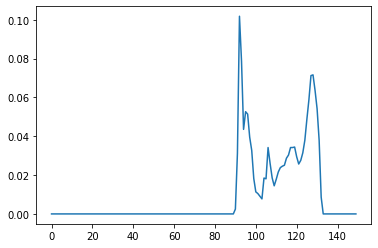

In [25]:
plt.plot(prepro.ds['cl_l'][15000][0])

In [37]:
goalvar_eval.

(1382400,)

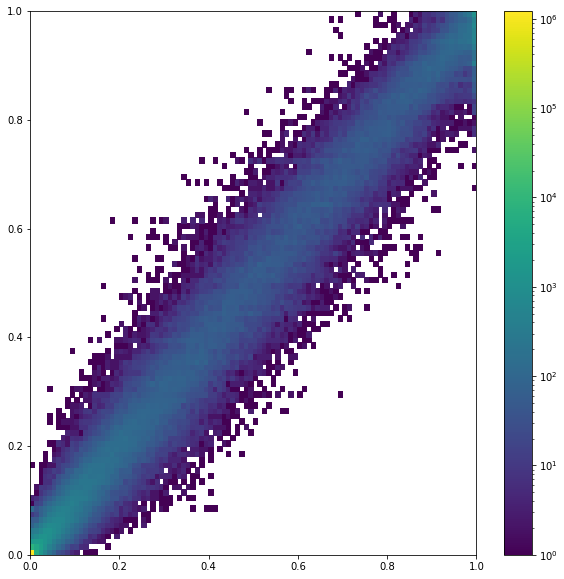

In [35]:
# VISUALISATION
cft.hist_plot(goal_var_pred, goalvar_eval)